# Data visualizations

This last part of the project consists of two major parts: (A) usual analyses and visualization, and (B) spatial analysis using geopandas. In (A) we analyse various core but also minor (yet interesting) aspects. In (B) we visualize on the map of Prague districts the intensity of rents supplied but also average prices per each district.

In [20]:
%store -r data1

In [3]:
import pandas as pd
import numpy as np

In [21]:
pd.set_option('display.max_columns', None)
data1.head(4)

,Adresa,Aktualizace,Cena,Price_total,ID_zakázky:,Plocha_podlahová,Podlaží,Podlaží_č,Poznámka_k_ceně,Stav_objektu,Stavba,Title,Rooms,Area,Vlastnictví,Vybavení,Výtah,Bankomat_name,Bankomat_dist,Bus_MHD_name,Bus_MHD_dist,Cukrárna_name,Cukrárna_dist,Divadlo_name,Divadlo_dist,Hospoda_name,Hospoda_dist,Hřiště_name,Hřiště_dist,Kino_name,Kino_dist,Kulturní_památka_name,Kulturní_památka_dist,Lékař_name,Lékař_dist,Lékárna_name,Lékárna_dist,Metro_name,Metro_dist,Obchod_name,Obchod_dist,Pošta_name,Pošta_dist,Restaurace_name,Restaurace_dist,Sportoviště_name,Sportoviště_dist,Tram_name,Tram_dist,Veterinář_name,Veterinář_dist,Večerka_name,Večerka_dist,Vlak_name,Vlak_dist,Škola_name,Škola_dist,Školka_name,Školka_dist,Energy_class,Adress_clean,location
0,"Dobrovolného, Praha 9 - Černý Most Panorama",Dnes,12000.0,12 000 Kč za měsíc,N05462,26.0,1. podlaží z celkem 5,1,"+ 2.500,-Kč poplatky, elektřina, provize RK",Novostavba,Skeletová,Pronájem bytu 1+kk 26 m²,1+kk,26,Osobní,NaN,NaN,Bankomat České spořitelny,542.0,Generála Janouška,132.0,Shisha Room Dvin,1144.0,Přírodní divadlo Dády Stoklasy,3152.0,Šenk Na Rajské,476.0,Dětské hřiště Rajský vrch,162.0,CineStar Černý Most,1815.0,Hajnova vila,3984.0,MUDr. Zdeněk Valentík,363.0,Lékárna U Rajské zahrady,500.0,Rajská zahrada,525.0,Kaufland,1486.0,"Pošta Praha 98 - Česká pošta, s.p.",442.0,Jiří Stopfer,443.0,Veřejné hřiště na míčové hry Pospíchalova,295.0,Lehovec,1136.0,MetropoleVet Praha s.r.o.,623.0,Albert Supermarket,451.0,Praha-Kyje,1445.0,"ZUŠ Praha 9, Ratibořická",234.0,MŠ Sluníčko Praha 9 - Černý Most,279.0,G,"Dobrovolného, Praha 9","(50.1017892, 14.5615725)"
1,"Bořivojova, Praha 3 - Žižkov Panorama",Dnes,9500.0,"9 500 Kč za nemovitost, + provize RK",57/4562,23.0,5. podlaží z celkem 4,5,"plus poplatky, 500",Dobrý,Cihlová,Pronájem bytu 1+kk 23 m²,1+kk,23,Osobní,NaN,NaN,Bankomat České spořitelny,122.0,Tachovské náměstí,443.0,Klub JINÝ KAFE,283.0,Žižkovské divadlo Járy Cimrmana,280.0,Hospůdka U Habásků,209.0,Dětské hřiště Bořivojova,294.0,Filmový klub VŠE,691.0,Dům U černé Matky Boží,1846.0,MUDr. Milan Hudi,502.0,Lékárna U Matky Boží,147.0,Jiřího z Poděbrad,652.0,"PAVILON, a.s.",941.0,"Pošta Praha 35 - Česká pošta, s.p.",176.0,Restaurace Lavička,119.0,Sportovní centrum Olšanka,469.0,Lipanská,186.0,MVDr. Jan Dubský,425.0,Shalamar Foods,165.0,Praha hlavní nádraží,984.0,Gymnázium Karla Sladkovského Praha 3,56.0,ZŠ a MŠ Jaroslava Seiferta Praha 3,243.0,G,"Bořivojova, Praha 3","(50.0821429, 14.4537291)"
2,"Tupolevova, Praha 9 - Letňany Panorama",Dnes,13900.0,13 900 Kč za měsíc,NaN,NaN,4. podlaží,4,NaN,Velmi dobrý,Panelová,Pronájem bytu 2+1 52 m²,2+1,52,Osobní,NaN,1.0,Bankomat České spořitelny,236.0,Šumperská,177.0,Café Infinity,204.0,Divadlo Pohádka,1057.0,Pivnice na Královce,1824.0,Venkovní posilovna u obchodního centra,194.0,Cinema City Letňany,223.0,Hajnova vila,2248.0,MUDr. Petr Zieg,317.0,"APOMED, s.r.o.",302.0,Letňany,1382.0,Tesco,366.0,"Pošta Praha 99 - Česká pošta, s.p.",680.0,Pub Infinity,207.0,Surf Arena,350.0,Sídliště Ďáblice,1906.0,Veterinární ordinace Letňany,302.0,Penny Market,183.0,Praha-Čakovice,1695.0,Základní škola Fryčovická,160.0,MŠ Havířovská,255.0,NaN,"Tupolevova, Praha 9","(50.1273975, 14.5148998)"
3,"Podbělohorská, Praha 5 - Smíchov Panorama",Dnes,15000.0,"15 000 Kč za nemovitost, + provize RK",44/4562,58.0,2. podlaží z celkem 3,2,", 3500",Novostavba,Cihlová,Pronájem bytu 2+kk 58 m²,2+kk,58,Osobní,NaN,NaN,Bankomat Komerční banky,381.0,Pod Lipkami,30.0,Cukrárna Pod Marjánkou,1333.0,JUDr. Jiří Šilhán,279.0,Restaurace Na zámyšli,423.0,Dětské hřiště Na Vršku,116.0,CineStar Anděl,2038.0,Šaldova vila,757.0,MUDr. Drahomíra Miškovská,309.0,Lékárna Melissa,447.0,Radlická,2026.0,Obchodní centrum Nový Smíchov,2075.0,"Pošta Praha 56 - Česká pošta, s.p.",379.0,ŘÍZKÁRNA ROZVOZ JÍDEL,345.0,TJ Banka Praha z.s.,345.0,Kavalírka,370.0,"Veterinární klinika - MVDr. Pavel Santar, MVDr...",1141.0,Smíšené zboží Plzeňská\t187,404.0,Praha-Cibulka,1229.0,ZUŠ Na Popelce,224.0,"TROIS PETITES POMMES, s.r.o.",343

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [6]:
def group_exm(var_name): #this function returns values and they frequency of occurence
    return data1.groupby(var_name)[var_name].count()  

# A) Usual analyses and visualizations

## Prices inspection

In [7]:
data1['Cena'].describe()

count      7646.000000
mean      22432.486529
std       16053.091726
min          12.000000
25%       13500.000000
50%       17500.000000
75%       25000.000000
max      240000.000000
Name: Cena, dtype: float64

In [8]:
np.histogram(data1['Cena'], bins = [0,5000,10000,15000,20000,25000,30000, 100000000])

(array([  11,  427, 2216, 1904,  967,  667, 1454]),
 array([        0,      5000,     10000,     15000,     20000,     25000,
            30000, 100000000]))

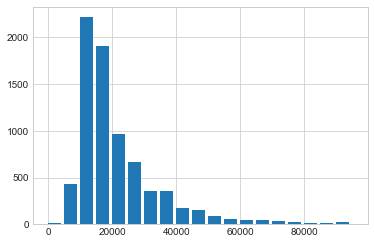

In [9]:
plt.hist(data1['Cena'], np.arange(0,100000, step = 5000), width = 4000)
plt.show()

In [10]:
#to sort the prices into categories we can use various approaches... e.g. these:
# data1['Cena_cat'] = pd.cut(data1['Cena'], bins=np.linspace(0, 200000, 15))
# data1['Cena_cat'] = pd.qcut(data1['Cena'], q=10)

In [23]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
data1['Cena_cat'] = pd.cut(data1['Cena'], bins=interval_range)
data1.head()

,Adresa,Aktualizace,Cena,Price_total,ID_zakázky:,Plocha_podlahová,Podlaží,Podlaží_č,Poznámka_k_ceně,Stav_objektu,Stavba,Title,Rooms,Area,Vlastnictví,Vybavení,Výtah,Bankomat_name,Bankomat_dist,Bus_MHD_name,Bus_MHD_dist,Cukrárna_name,Cukrárna_dist,Divadlo_name,Divadlo_dist,Hospoda_name,Hospoda_dist,Hřiště_name,Hřiště_dist,Kino_name,Kino_dist,Kulturní_památka_name,Kulturní_památka_dist,Lékař_name,Lékař_dist,Lékárna_name,Lékárna_dist,Metro_name,Metro_dist,Obchod_name,Obchod_dist,Pošta_name,Pošta_dist,Restaurace_name,Restaurace_dist,Sportoviště_name,Sportoviště_dist,Tram_name,Tram_dist,Veterinář_name,Veterinář_dist,Večerka_name,Večerka_dist,Vlak_name,Vlak_dist,Škola_name,Škola_dist,Školka_name,Školka_dist,Energy_class,Adress_clean,location,Cena_cat
0,"Dobrovolného, Praha 9 - Černý Most Panorama",Dnes,12000.0,12 000 Kč za měsíc,N05462,26.0,1. podlaží z celkem 5,1,"+ 2.500,-Kč poplatky, elektřina, provize RK",Novostavba,Skeletová,Pronájem bytu 1+kk 26 m²,1+kk,26,Osobní,NaN,NaN,Bankomat České spořitelny,542.0,Generála Janouška,132.0,Shisha Room Dvin,1144.0,Přírodní divadlo Dády Stoklasy,3152.0,Šenk Na Rajské,476.0,Dětské hřiště Rajský vrch,162.0,CineStar Černý Most,1815.0,Hajnova vila,3984.0,MUDr. Zdeněk Valentík,363.0,Lékárna U Rajské zahrady,500.0,Rajská zahrada,525.0,Kaufland,1486.0,"Pošta Praha 98 - Česká pošta, s.p.",442.0,Jiří Stopfer,443.0,Veřejné hřiště na míčové hry Pospíchalova,295.0,Lehovec,1136.0,MetropoleVet Praha s.r.o.,623.0,Albert Supermarket,451.0,Praha-Kyje,1445.0,"ZUŠ Praha 9, Ratibořická",234.0,MŠ Sluníčko Praha 9 - Černý Most,279.0,G,"Dobrovolného, Praha 9","(50.1017892, 14.5615725)","(10000, 20000]"
1,"Bořivojova, Praha 3 - Žižkov Panorama",Dnes,9500.0,"9 500 Kč za nemovitost, + provize RK",57/4562,23.0,5. podlaží z celkem 4,5,"plus poplatky, 500",Dobrý,Cihlová,Pronájem bytu 1+kk 23 m²,1+kk,23,Osobní,NaN,NaN,Bankomat České spořitelny,122.0,Tachovské náměstí,443.0,Klub JINÝ KAFE,283.0,Žižkovské divadlo Járy Cimrmana,280.0,Hospůdka U Habásků,209.0,Dětské hřiště Bořivojova,294.0,Filmový klub VŠE,691.0,Dům U černé Matky Boží,1846.0,MUDr. Milan Hudi,502.0,Lékárna U Matky Boží,147.0,Jiřího z Poděbrad,652.0,"PAVILON, a.s.",941.0,"Pošta Praha 35 - Česká pošta, s.p.",176.0,Restaurace Lavička,119.0,Sportovní centrum Olšanka,469.0,Lipanská,186.0,MVDr. Jan Dubský,425.0,Shalamar Foods,165.0,Praha hlavní nádraží,984.0,Gymnázium Karla Sladkovského Praha 3,56.0,ZŠ a MŠ Jaroslava Seiferta Praha 3,243.0,G,"Bořivojova, Praha 3","(50.0821429, 14.4537291)","(0, 10000]"
2,"Tupolevova, Praha 9 - Letňany Panorama",Dnes,13900.0,13 900 Kč za měsíc,NaN,NaN,4. podlaží,4,NaN,Velmi dobrý,Panelová,Pronájem bytu 2+1 52 m²,2+1,52,Osobní,NaN,1.0,Bankomat České spořitelny,236.0,Šumperská,177.0,Café Infinity,204.0,Divadlo Pohádka,1057.0,Pivnice na Královce,1824.0,Venkovní posilovna u obchodního centra,194.0,Cinema City Letňany,223.0,Hajnova vila,2248.0,MUDr. Petr Zieg,317.0,"APOMED, s.r.o.",302.0,Letňany,1382.0,Tesco,366.0,"Pošta Praha 99 - Česká pošta, s.p.",680.0,Pub Infinity,207.0,Surf Arena,350.0,Sídliště Ďáblice,1906.0,Veterinární ordinace Letňany,302.0,Penny Market,183.0,Praha-Čakovice,1695.0,Základní škola Fryčovická,160.0,MŠ Havířovská,255.0,NaN,"Tupolevova, Praha 9","(50.1273975, 14.5148998)","(10000, 20000]"
3,"Podbělohorská, Praha 5 - Smíchov Panorama",Dnes,15000.0,"15 000 Kč za nemovitost, + provize RK",44/4562,58.0,2. podlaží z celkem 3,2,", 3500",Novostavba,Cihlová,Pronájem bytu 2+kk 58 m²,2+kk,58,Osobní,NaN,NaN,Bankomat Komerční banky,381.0,Pod Lipkami,30.0,Cukrárna Pod Marjánkou,1333.0,JUDr. Jiří Šilhán,279.0,Restaurace Na zámyšli,423.0,Dětské hřiště Na Vršku,116.0,CineStar Anděl,2038.0,Šaldova vila,757.0,MUDr. Drahomíra Miškovská,309.0,Lékárna Melissa,447.0,Radlická,2026.0,Obchodní centrum Nový Smíchov,2075.0,"Pošta Praha 56 - Česká pošta, s.p.",379.0,ŘÍZKÁRNA ROZVOZ JÍDEL,345.0,TJ Banka Praha z.s.,345.0,Kavalírka,370.0,"Veterinární klinika - MVDr. Pavel Santar, MVDr...",1141.0,Smíšené zboží Plzeňská\t187,404.0,Praha-Cibulka,1229.0

In [12]:
data1.pivot_table(index='Cena_cat', margins= True)

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,Lékař_dist,Lékárna_dist,Metro_dist,Obchod_dist,Plocha_podlahová,Podlaží_č,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Cena_cat,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 10000]",28.870307,399.166372,215.298791,8839.356655,444.615929,1155.885510,761.511504,271.148532,1682.014337,1740.837113,426.398230,467.994690,981.803309,1085.257603,29.314286,2.890785,595.293805,192.803540,537.094991,708.508897,627.555752,332.060177,1200.671280,0.689373,335.334513,308.302655
"(10000, 20000]",53.515123,325.672547,220.125150,15078.733223,382.428323,924.450814,742.767702,257.086104,1489.401951,1681.566604,385.423851,405.490435,826.438751,951.691635,53.481732,3.292533,531.654907,178.344845,520.198517,605.326541,634.071304,305.582857,1179.535680,0.790030,270.068323,297.398758
"(20000, 30000]",82.329530,290.192771,250.615228,24964.864430,314.345854,585.563430,708.350815,297.241168,1147.982232,1351.887719,345.304748,394.209072,589.702610,826.670228,80.499493,3.357718,504.589653,141.727853,537.815897,345.755297,594.063785,301.976612,1094.396599,0.839854,243.816442,278.330262
"(30000, 40000]",105.426449,277.267296,272.696049,35530.838039,257.509434,420.735849,780.056604,318.828788,964.606299,1143.261002,311.742138,359.106918,486.083587,720.095912,103.418719,3.800892,471.361635,123.440252,604.551515,238.671733,601.119497,273.787736,1062.805471,0.899396,202.018868,256.948113
"(40000, 50000]",130.420139,278.073077,256.303249,45758.656250,213.207692,409.888462,753.376923,335.808664,823.243243,992.690909,322.753846,397.119231,478.873646,701.007692,129.927374,3.718750,437.707692,121.630769,602.833935,259.068592,657.711538,327.611538,1081.054348,0.886139,169.642308,267.234615
"(50000, 60000]",143.924242,187.180328,244.674419,55019.424242,146.614754,299.418033,697.557377,358.899225,699.098361,1141.511628,233.655738,328.852459,387.046512,628.909836,141.294118,3.909091,277.540984,89.377049,664.945736,191.658915,524.303279,266.163934,981.759690,0.925532,156.393443,232.704918
"(60000, 70000]",170.453488,311.564103,359.600000,65770.918605,243.038462,501.205128,705.871795,267.670588,985.974359,1081.458824,312.115385,341.166667,460.623529,667.346154,161.230769,3.767442,548.564103,120.076923,548.188235,246.376471,515.358974,347.384615,1172.600000,0.935484,187.666667,261.666667
"(70000, 80000]",176.357143,292.176471,328.277778,75154.482143,193.392157,369.705882,633.882353,271.055556,881.470588,1043.185185,201.372549,353.019608,476.074074,738.764706,171.848485,3.392857,346.058824,123.686275,604.425926,194.166667,695.058824,334.666667,1093.462963,0.944444,145.098039,314.215686
"(80000, 90000]",196.742857,193.029412,304.257143,87095.914286,188.382353,448.647059,453.529412,334.828571,741.235294,847.771429,267.205882,304.294118,292.171429,672.441176,199.523810,4.742857,419.411765,141.382353,524.742857,171.971429,505.617647,404.705882,1098.571429,0.958333,160.470588,275.617647


## Condition of the flat

In [13]:
data1.pivot_table(index='Stav_objektu', margins= True)

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,Lékař_dist,Lékárna_dist,Metro_dist,Obchod_dist,Plocha_podlahová,Podlaží_č,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Stav_objektu,,,,,,,,,,,,,,,,,,,,,,,,,,
Dobrý,61.823810,317.267462,221.384117,18595.077815,347.074957,808.424915,710.989779,243.662885,1477.796902,1551.352113,354.223169,372.582624,751.894910,940.936644,56.579545,3.069841,528.451448,169.458262,528.411669,488.379705,576.894378,292.548552,1172.392220,0.662309,237.017036,266.761499
K demolici,83.000000,368.000000,243.000000,17000.000000,308.000000,1621.000000,2394.000000,45.000000,660.000000,2726.000000,196.000000,278.000000,1751.000000,896.000000,83.000000,9.000000,590.000000,313.000000,220.000000,2313.000000,255.000000,136.000000,1131.000000,1.000000,282.000000,229.000000
Novostavba,66.218627,425.426216,234.901363,19837.180703,519.280297,1299.558626,927.388293,264.023237,1778.597176,1967.016569,494.137675,531.747733,1042.344713,1073.709061,65.257110,3.520916,640.251443,250.585326,521.393429,861.370675,779.061006,364.741138,1264.833601,0.951245,382.584501,368.178071
Po rekonstrukci,70.925551,281.458491,239.408816,23289.943210,283.322013,626.923222,681.575472,279.096618,1140.696338,1386.888036,321.647170,359.551572,610.776900,811.166140,69.363080,3.437761,479.045283,127.963522,540.746981,372.154033,565.318868,281.344654,1103.714804,0.827966,219.558491,265.804403
Projekt,53.500000,273.500000,261.000000,12925.000000,119.500000,1705.000000,1162.500000,177.000000,2913.500000,NaN,980.500000,390.500000,2789.500000,236.000000,45.000000,3.000000,982.500000,177.000000,415.000000,1620.500000,895.000000,221.000000,1632.500000,1.000000,443.000000,473.500000
Před rekonstrukcí,92.727273,227.800000,141.545455,32772.727273,412.200000,1295.200000,531.600000,229.272727,1376.900000,1550.250000,322.800000,329.500000,738.000000,886.600000,66.000000,3.727273,540.900000,109.700000,423.636364,687.272727,552.300000,140.200000,1568.545455,0.750000,192.500000,134.300000
Ve výstavbě,55.000000,440.000000,52.000000,13990.000000,228.000000,1438.000000,1288.000000,272.000000,1138.000000,1563.000000,602.000000,723.000000,956.000000,958.000000,55.000000,5.000000,905.000000,243.000000,540.000000,56.000000,1830.000000,272.000000,468.000000,1.000000,254.000000,402.000000
Velmi dobrý,73.154187,297.016786,237.532338,23393.748805,322.266601,693.673687,705.373241,283.696568,1257.071429,1427.772129,347.012589,382.791410,677.049591,868.192422,70.692835,3.317938,489.484819,149.143175,548.099882,440.931644,598.342138,303.003950,1127.170657,0.788653,232.619600,276.646013
All,74.125000,296.428140,231.164251,22655.431763,327.567029,653.603865,739.489130,282.735507,1298.105072,1496.635870,336.334541,394.041063,661.887077,860.750000,72.881039,3.532005,475.220411,150.551329,511.795894,399.928744,591.618961,300.310386,1116.426329,0.792874,235.884662,275.352053


In [31]:
condition = group_exm('Stav_objektu')

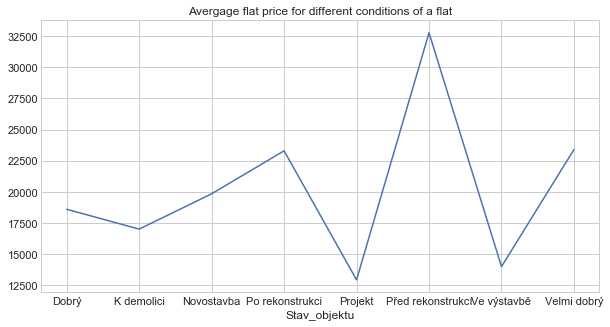

In [17]:
b = data1.groupby('Stav_objektu')['Cena'].mean()
plt.figure(figsize=(10,5))
b.plot()
plt.title("Avergage flat price for different conditions of a flat")
plt.show()

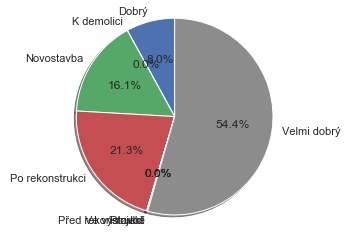

In [37]:
labels = 'Dobrý', 'K demolici', 'Novostavba','Po rekonstrukci', 'Projekt', 'Před rekonstrukcí', 'Ve výstavbě','Velmi dobrý'

fig1, ax1 = plt.subplots()
ax1.pie(condition, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

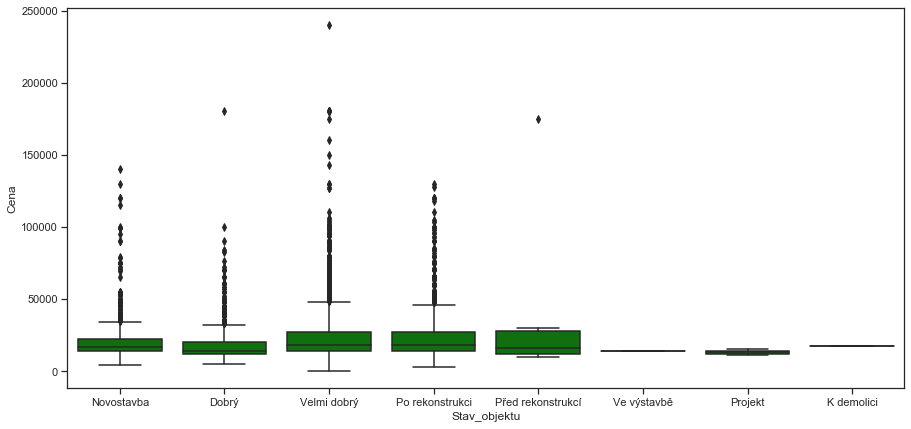

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data1,
    x='Stav_objektu',
    y='Cena',
    color='green')

## Number of floors

In [99]:
x = np.array(data1.Cena)
y = np.array(data1.Podlaží_č)
a = data1.groupby('Podlaží_č')['Cena'].mean()
print(a)

Podlaží_č
-1    10614.285714
 0    20222.758621
 1    19370.094972
 2    21843.314251
 3    21930.259935
 4    22963.783189
 5    24964.460474
 6    25779.676876
 7    25228.108696
 8    17061.325843
 9    16910.189189
Name: Cena, dtype: float64


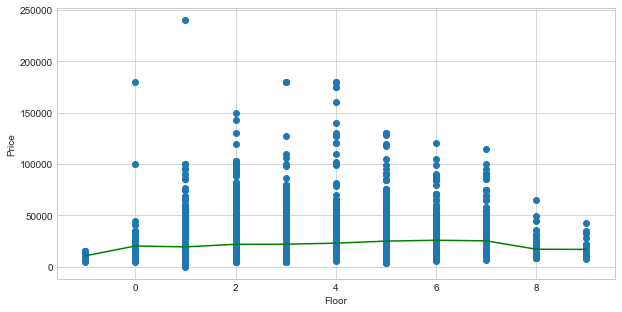

In [100]:
f = [-1,0,1,2,3,4,5,6,7,8,9]
a

plt.figure(figsize=(10,5))
plt.plot(f,a, "g")
plt.scatter(y, x)
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

## "Cukrárna" in neighborhood?

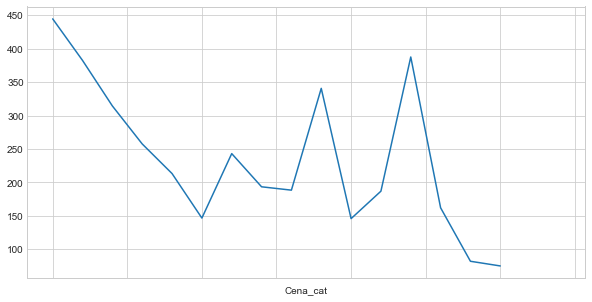

In [101]:
c = data1.groupby('Cena_cat')['Cukrárna_dist'].mean()
plt.figure(figsize=(10,5))
c.plot()
plt.show()

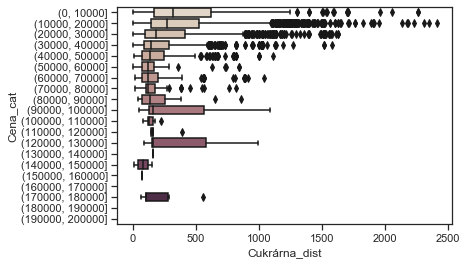

In [26]:
sns.boxplot(
    y="Cena_cat", 
    x="Cukrárna_dist", 
    palette="ch:.25", 
    data=data1)

## Area of a flat

In [42]:
from sklearn.linear_model import LinearRegression

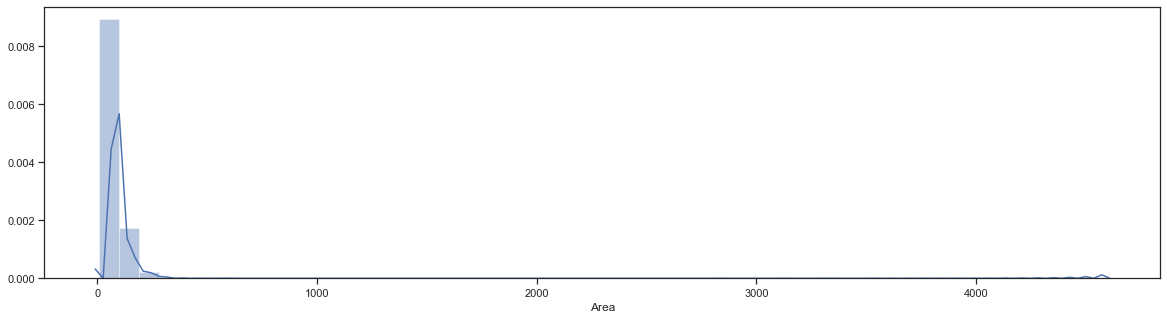

In [77]:
plt.figure(figsize=(20,5))
plt.tight_layout()
sns.distplot(data1['Area'])

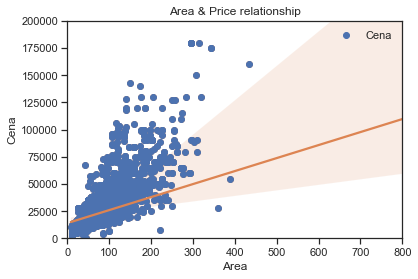

In [76]:
data1.plot(x='Area', y='Cena', style='o')  
plt.title('Area & Price relationship')  
plt.xlabel('Area')  
plt.ylabel('Cena') 
sns.regplot('Area','Cena',data=data1)
plt.xlim((0, 800)) #Based on the figure above, limiting the area to 800 m^2 seems pretty adequate.
plt.ylim((0,200000))
plt.show()

## Energy demans

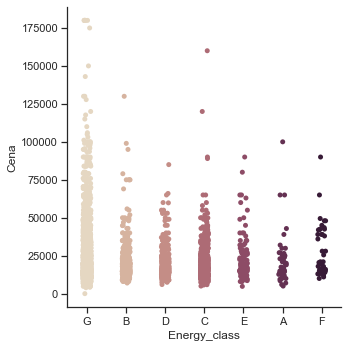

In [19]:
sns.catplot(
    x="Energy_class", 
    y="Cena", 
    palette="ch:.25", 
    data=data1)

# B) GEOPANDAS SPATIAL ANALYSIS

First, we upload the Prague districts (from the open data source www.geoportalpraha.cz/cs/data/otevrena-data/). Second, we set the realistic map of Prague using folium package. Third, having the data prepared with location column (latitude, longitude), we can put all of this together to enjoy juicy visualizations of number of supplid flats per district or average prices per district.

In [104]:
import geopandas as gpd

## Preparing the settup
### Upload Prague districts from open sources 

In [105]:
mestske_casti = gpd.read_file('TMMESTSKECASTI_P.json')

In [106]:
print(mestske_casti.head(5)) #we can see that especially columns "NAZEV_1" will be crucial (it must match with our districts)

   OBJECTID       DAT_VZNIK       DAT_ZMENA       PLOCHA  ID  KOD_MC  \
0         1  20181106141412  20191105233720  10183715.83  25  547310   
1         2  20171110095818  20190423111436  13529637.40   9  547361   
2         3  20181009145125  20200203101156  23317909.05   4  547107   
3         4  20181106141412  20181106164427   3253142.41  52  547174   
4         5  20160422155519  20200102142501   4988872.32  46  547301   

             NAZEV_MC  KOD_MO KOD_SO  TID_TMMESTSKECASTI_P   POSKYT  \
0      Praha-Čakovice      94    221                    25  HMP-IPR   
1            Praha 14      94    141                     9  HMP-IPR   
2            Praha 12      43    124                     4  HMP-IPR   
3            Praha 17      60    213                    52  HMP-IPR   
4  Praha-Dolní Chabry      86     86                    46  HMP-IPR   

   ID_POSKYT STAV_ZMENA       NAZEV_1  Shape_Length    Shape_Area  \
0         43          U      Čakovice  18510.070841  1.018372e+07   
1 

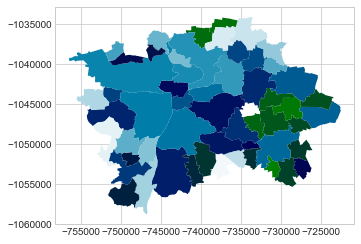

In [107]:
mestske_casti.plot(column='NAZEV_1', cmap= 'ocean')

### Interactive map of Prague
(interactive map of Prague, centered with the National Theatre, using folium package)

In [108]:
import folium

In [284]:
national_theatre = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12)
display(national_theatre)

### Spatial merge (.sjoin) of our data and Prague districts

## Analysing intensity of supplied flats per district

### Choropleth

Use a lambda expression and the pandas apply() method to divide the number of building permits issued for projects in each council district by the area of that district to get a normalized value for the permits issued.

## Analysing average prices of supplied flats per district

## Concluding remarks

- Chceme ještě nějak hrotit to metro?
- Zmínit koronavirus a to jak ovlivňuje ceny nemovitostí (takže normálně by ceny bytů v centru byly dražší - pro srovnání můžeme jen jednoduše nakopírovat pár historických cen). => ubjektivní pohled potvrzují i data Bezrealitky.cz, které od poloviny března zaznamenaly výrazně vyšší nárůst u pražských bytů zařazovaných do nabídky. Zatímco v hlavním městě jich bylo aktivovaných v nabídce 1 544, během března (k 27. 3.) již 2 183. To je nárůst o 41 procent.

TO DELETE?

In [282]:
#dokazeme urcit pozici metra pouze s techto dat pomoci kruznic a pruseciku

In [272]:
def simple_adress(x):
   
    if ~(type(x) == float and np.isnan(x)): #this check if a valus is not an NA
        lis = x.split('-') #splits the string by "-"
        lis_x = lis[0].replace("Panorama","") 
        return lis_x
    else:
        return x #if NA stay NA

In [273]:
data1['Adress_clean'] = data1['Adresa'].apply(simple_adress)

In [149]:
import geopy
from geopy.geocoders import Nominatim
nom = Nominatim(user_agent="my-application")

In [232]:
def get_geo_info(place_name):
    """
    Gets coordinates and address for a given place name using geopy.

    :param place_name: Name of place to search for, eg "San Francisco"
    :return: Location object with latitude, longitude and name attributes
    """

    from geopy.geocoders import Nominatim

    # Create geo_locator object instance
    geo_locator = Nominatim(user_agent="my-application")

    # Attempt to obtain geo data for given place name
    try:
        location = geo_locator.geocode(place_name, timeout=1)
    except Exception:
        raise Exception("Location error")

    if not location:
        raise Exception("Location error")

    return location 

In [275]:
get_geo_info(data1['Adress_clean'][21])

Location(V Háji, Holešovice, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 17004, Česká republika, (50.1019058, 14.4541955, 0.0))

In [278]:
print(data1.Adress_clean[4000:4050])

4000                    Maiselova, Praha 1 
4001                               Praha 4 
4002                    Maiselova, Praha 1 
4003                    Štěpánská, Praha 1 
4004                    Zderazská, Praha 5 
4005                    Zborovská, Praha 5 
4006                       Husova, Praha 1 
4007                       Husova, Praha 1 
4008                               Praha 8 
4009                       Husova, Praha 1 
4010                    Balbínova, Praha 2 
4011                       Husova, Praha 1 
4012                       Husova, Praha 1 
4013                 Přesličková, Praha 10 
4014                   Gruzínská, Praha 10 
4015                   Podlipného, Praha 8 
4016                   Podlipného, Praha 8 
4017                   Podlipného, Praha 8 
4018                   Podlipného, Praha 8 
4019                    Buzulucká, Praha 6 
4020      U nemocenské pojišťovny, Praha 1 
4021                      Školská, Praha 1 
4022                      Školsk

In [236]:
locations = [get_geo_info(i) for i in data1.Adress_clean[k]]

[Location(Dobrovolného, Černý Most, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 19800, Česká republika, (50.1017892, 14.5615725, 0.0)),
 Location(Bořivojova, Žižkov, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 13005, Česká republika, (50.0821429, 14.4537291, 0.0)),
 Location(Tupolevova, Letňany, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 19900, Česká republika, (50.1273975, 14.5148998, 0.0)),
 Location(Podbělohorská, Smíchov, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 22000, Česká republika, (50.0732544, 14.3812666, 0.0)),
 Location(368/4, Mezi Domy, Písnice, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 14200, Česká republika, (50.0030025, 14.4615068, 0.0)),
 Location(Ke Kurtům, Písnice, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 14200, Česká republika, (50.0015302, 14.463371, 0.0)),
 Location(1/1, Sněmovní, Malá Strana, Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, 11800, Če

In [279]:
locations = []

for adress in data1.Adress_clean[4000:4010]:
    try:
        location = get_geo_info(adress)
        locations.append((location.latitude, location.longitude))
        
    except Exception as e:
        locations.append('NaN')

In [280]:
locations

[(50.0881768, 14.4187229),
 (50.04895, 14.4417517),
 (50.0881768, 14.4187229),
 (50.0784819, 14.4255054),
 (49.9811397, 14.3510541),
 (50.1962605, 14.6884787),
 (50.0854955, 14.4182849),
 (50.0854955, 14.4182849),
 (50.1029249, 14.4769295),
 (50.0854955, 14.4182849)]

In [242]:
data1['Coordinates'] = locations

ValueError: Length of values does not match length of index

In [217]:
locations[0].latitude, locations[0].longitude

(50.1017892, 14.5615725)

In [231]:
loc_coordinates = []
for address in locations:
    try:
        inputAddress = address
        location = g.geocode(inputAddress, timeout=15)
        loc_coordinates.append((location.latitude, location.longitude))
        loc_address.append(inputAddress)
    except Exception as e:
        print('Error, skipping address...', e)


df_geocodes = pd.DataFrame({'coordinate':loc_coordinates})

Error, skipping address... 'NoneType' object has no attribute 'latitude'
Error, skipping address... 'NoneType' object has no attribute 'latitude'
Error, skipping address... 'NoneType' object has no attribute 'latitude'
Error, skipping address... 'NoneType' object has no attribute 'latitude'
Error, skipping address... 'NoneType' object has no attribute 'latitude'


In [220]:
loc_coordinates

[(50.1017892, 14.5615725),
 (50.1017892, 14.5615725),
 (50.1017892, 14.5615725),
 (50.1017892, 14.5615725),
 (50.1017892, 14.5615725)]

In [185]:
def get_coordinates(k)

    try:
        latitude = locations[k].latitude
        
    except Exception:
        raise Exception("Coordinates error")
        
    if not coordinates:
        raise Exception("Coordinates error")

    return coordinates

SyntaxError: invalid syntax (<ipython-input-185-657fcec0134e>, line 1)